# Time series : Regression ancak zaman bagli Regression

In [1]:
#her saat başı veya her gün aynı saatte veri alınmalı gibi kurallar konursa veri zamana bağlı olmuş olur

In [2]:
#time series ile tahmin yapabilmek için verilerin stationary(sabit) olması gerek 
#yani sabit ort, sabit varyans, sabit kovaryans

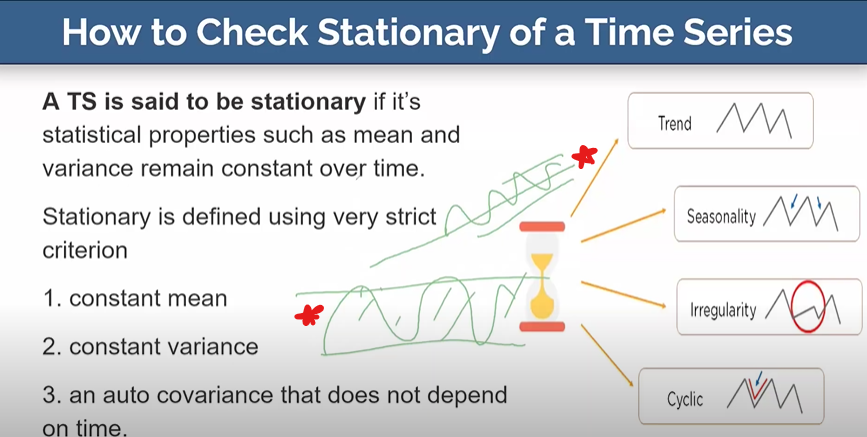

veri hep bu iki yıldızlı grafik gibi iki çizginin arasındaysa yani varyansı aynıysa time series analizi yapılabilir

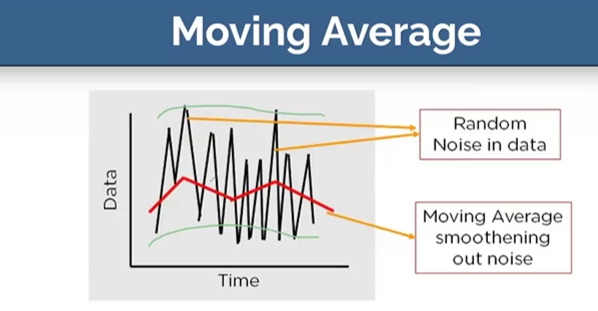

moving average= ortalamanın her gün değişmesi

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly. express as px

In [4]:
df=pd.read_csv('DailyDelhiClimateTrain.csv') #iklimle ilgili bilgiler

In [5]:
df.head() #sıcaklık, nem, rüzgar, basınç

date   meantemp   humidity  wind_speed  meanpressure
0  2013-01-01  10.000000  84.500000    0.000000   1015.666667
1  2013-01-02   7.400000  92.000000    2.980000   1017.800000
2  2013-01-03   7.166667  87.000000    4.633333   1018.666667
3  2013-01-04   8.666667  71.333333    1.233333   1017.166667
4  2013-01-05   6.000000  86.833333    3.700000   1016.500000

<Axes: >

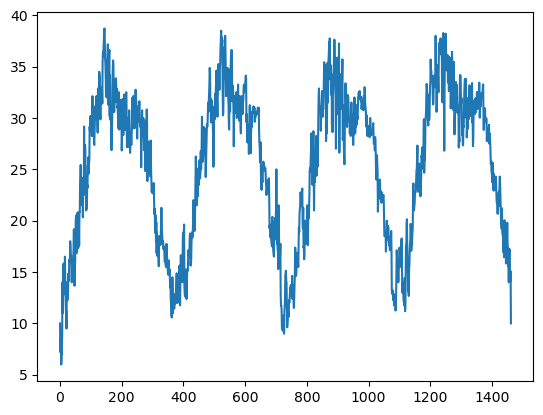

In [6]:
df.meantemp.plot()

In [7]:
px.line(df,x='date',y='meantemp') # plotly <3

In [8]:
px.line(df,x='date',y='humidity', title='New Delhi Ortalama Nem')

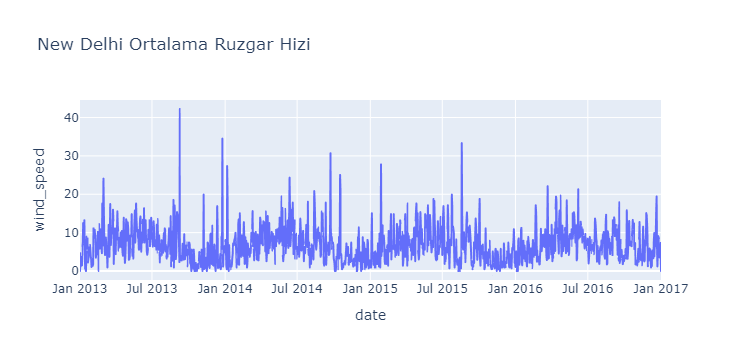

In [9]:
px.line(df,x='date',y='wind_speed', title='New Delhi Ortalama Ruzgar Hizi')

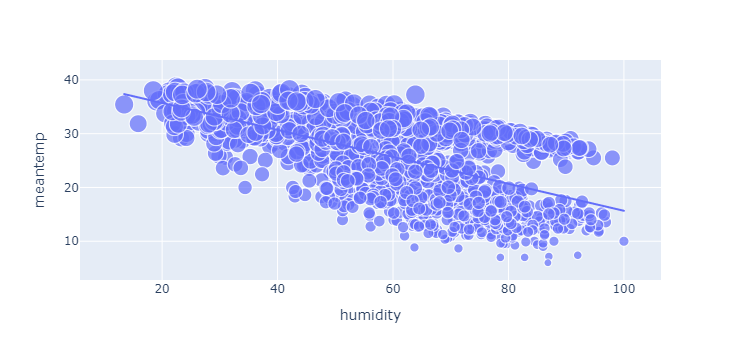

In [10]:
px.scatter(df,x='humidity',y='meantemp', size='meantemp', trendline='ols') #sıcaklık em ilişkisi

In [11]:
df['date']=pd.to_datetime(df['date'], format='%Y-%m-%d')

In [12]:
df['year' ]=df['date'].dt.year
df['month']=df['date'].dt.month

In [13]:
df.head()

date   meantemp   humidity  wind_speed  meanpressure  year  month
0 2013-01-01  10.000000  84.500000    0.000000   1015.666667  2013      1
1 2013-01-02   7.400000  92.000000    2.980000   1017.800000  2013      1
2 2013-01-03   7.166667  87.000000    4.633333   1018.666667  2013      1
3 2013-01-04   8.666667  71.333333    1.233333   1017.166667  2013      1
4 2013-01-05   6.000000  86.833333    3.700000   1016.500000  2013      1

<Axes: xlabel='month', ylabel='meantemp'>

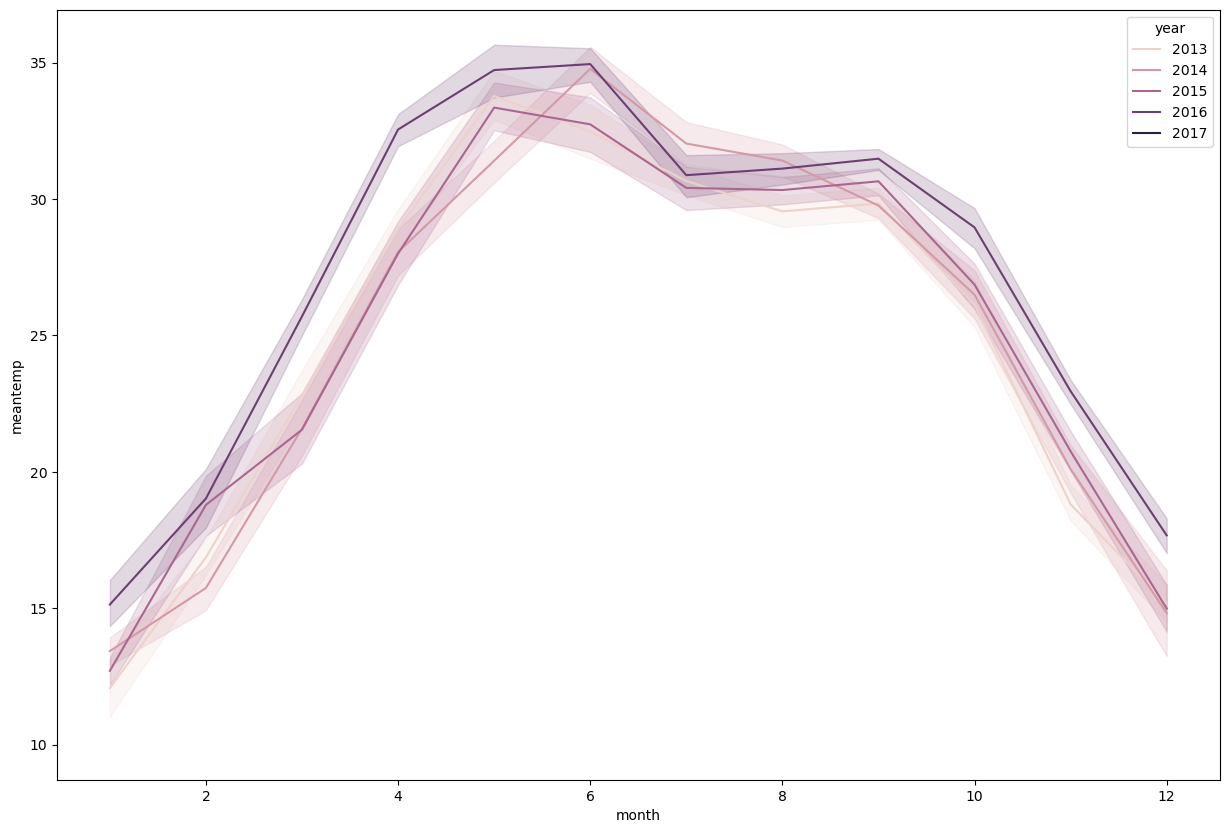

In [14]:
plt.figure(figsize=(15,10))
sns.lineplot(df,x='month',y='meantemp',hue='year') #hue year yani yıla göre renklendir
#her yıl aylara göre sıcaklık grafiği

In [15]:
# 4 yılı eğitip son yılı tahmin edicem

In [22]:
#!pip install prophet 

In [23]:
forecast_data=df.rename(columns={'date':'ds','meantemp':'y'})

### Prophet paketi geçmişten geleceği tahmin ediyor

16:49:07 - cmdstanpy - INFO - Chain [1] start processing
16:49:08 - cmdstanpy - INFO - Chain [1] done processing


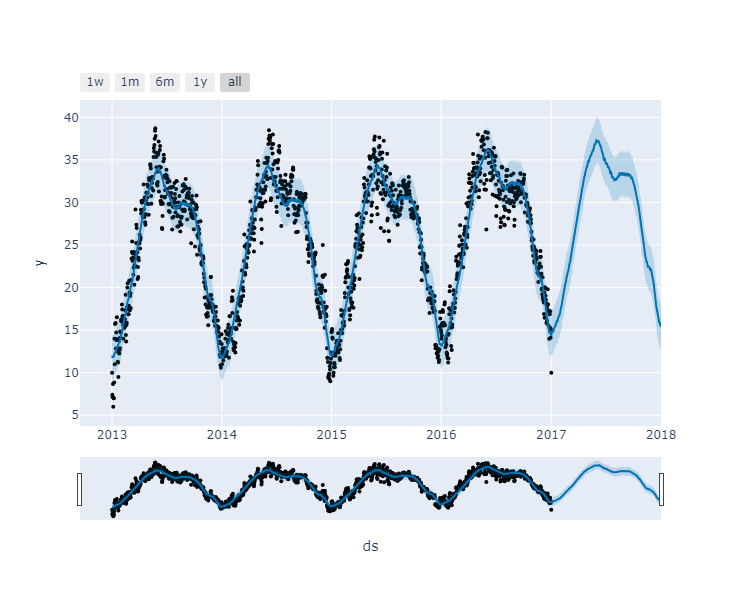

In [24]:
from prophet import Prophet
from prophet.plot import plot_plotly, plot_components_plotly
model=Prophet()
model.fit(forecast_data)
forecasts=model.make_future_dataframe(periods=365)
predictions=model.predict(forecasts)
plot_plotly(model,predictions)